In [1]:
import pandas as pd

In [2]:
def cleanTitanic(path):
    data = pd.read_csv(path)
    data.drop(columns='Cabin', inplace=True)
    values = {'Age': data['Age'].mean(), 'Embarked':data['Embarked'].mode()[0] }
    data.fillna(value = values, inplace=True)
    data['female'] = pd.get_dummies(data['Sex'])['female']
    emb = pd.get_dummies(data['Embarked'])
    data['Emb Cherbourg'] = emb['C']
    data['Emb Queenstown'] = emb['Q']
    data['Emb Southampton'] = emb['S']
    return data

In [3]:
data = cleanTitanic('titanic_data/train (1).csv')
X = data[['Pclass',  'Age', 'SibSp',
       'Parch', 'Fare', 'female', 'Emb Cherbourg',
       'Emb Queenstown', 'Emb Southampton']]
y = data['Survived']

In [39]:
X.to_csv('titanic_data/cleaned_1.csv', index=False)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
test = cleanTitanic('titanic_data/test_2.csv')

In [6]:
def logistic_fit_and_predict(X_train, X_test, y_train, y_test, predict):
    from sklearn.linear_model import LogisticRegression
    from sklearn import preprocessing
    classifier = LogisticRegression(max_iter=1000, random_state=42)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_scaled = scaler.transform(X_train)
    classifier.fit(X_train, y_train)
    print(f"Training Data Score: {classifier.score(X_train, y_train)}")
    print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
    predict_sub = predict[['Pclass',  'Age', 'SibSp',
       'Parch', 'Fare', 'female', 'Emb Cherbourg',
       'Emb Queenstown', 'Emb Southampton']]
    scaler_predict = preprocessing.StandardScaler().fit(predict_sub)
    predict_scaled = scaler_predict.transform(predict_sub)
    survived = classifier.predict(predict_sub)
    predictions = pd.DataFrame({'PassengerId':list(test['PassengerId']), 'Survived':list(survived)})
    return predictions

In [7]:
predictions = logistic_fit_and_predict(X_train, X_test, y_train, y_test, test)

Training Data Score: 0.7827715355805244
Testing Data Score: 0.7752808988764045


In [8]:
predictions

,PassengerId,Survived
0,741,1
1,104,0
2,181,0
3,412,0
4,414,0
...,...,...
174,612,0
175,626,0
176,881,1
177,606,0


In [9]:
predictions.to_csv('submissions/s10_13_2.csv', index=False)

In [10]:
def KNN_and_predict(X_train, X_test, y_train, y_test, predict):
    from sklearn.neighbors import KNeighborsClassifier as KNN
    from sklearn import preprocessing
    classifier = KNN(leaf_size= 30, n_neighbors= 10, weights= 'uniform', random_state=42)
    X_scaled = preprocessing.StandardScaler().fit_transform(X_train)
    classifier.fit(X_scaled, y_train)
    X_test_scaled = StandardScaler().fit_transform(X_test_class)
    print(f"Training Data Score: {classifier.score(X_scaled, y_train)}")
    print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")
    predict_sub = predict[['Pclass',  'Age', 'SibSp',
       'Parch', 'Fare', 'female', 'Emb Cherbourg',
       'Emb Queenstown', 'Emb Southampton']]
    scaled_predict = StandardScaler().fit_transform(predict_sub)
    survived = classifier.predict(scaled_predict)
    predictions = pd.DataFrame({'PassengerId':list(test['PassengerId']), 'Survived':list(survived)})
    return predictions

In [11]:
predictions_knn = logistic_fit_and_predict(X_train, X_test, y_train, y_test, test)

Training Data Score: 0.7827715355805244
Testing Data Score: 0.7752808988764045


In [12]:
predictions_knn.to_csv('submissions/10_13_4_KNN.csv', index=False)

In [13]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [14]:
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

k: 1, Train/Test Score: 0.987/0.747
k: 3, Train/Test Score: 0.873/0.787
k: 5, Train/Test Score: 0.861/0.764
k: 7, Train/Test Score: 0.833/0.792
k: 9, Train/Test Score: 0.833/0.775
k: 11, Train/Test Score: 0.828/0.775
k: 13, Train/Test Score: 0.820/0.770
k: 15, Train/Test Score: 0.816/0.781
k: 17, Train/Test Score: 0.809/0.781
k: 19, Train/Test Score: 0.801/0.781


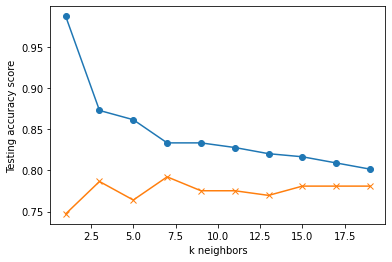

In [15]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNN(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV


In [17]:
param_grid = {
    'n_neighbors': [6, 9, 10, 11, 12],
    'weights': ['uniform', 'distance'],
    'leaf_size': [30, 40, 50, 60, 70]
}
model = KNN()
grid_clf = GridSearchCV(model, param_grid, verbose=3)

In [18]:
grid_clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ...leaf_size=30, n_neighbors=6, weights=uniform; total time=   0.0s
[CV 2/5] END ...leaf_size=30, n_neighbors=6, weights=uniform; total time=   0.0s
[CV 3/5] END ...leaf_size=30, n_neighbors=6, weights=uniform; total time=   0.0s
[CV 4/5] END ...leaf_size=30, n_neighbors=6, weights=uniform; total time=   0.0s
[CV 5/5] END ...leaf_size=30, n_neighbors=6, weights=uniform; total time=   0.0s
[CV 1/5] END ..leaf_size=30, n_neighbors=6, weights=distance; total time=   0.0s
[CV 2/5] END ..leaf_size=30, n_neighbors=6, weights=distance; total time=   0.0s
[CV 3/5] END ..leaf_size=30, n_neighbors=6, weights=distance; total time=   0.0s
[CV 4/5] END ..leaf_size=30, n_neighbors=6, weights=distance; total time=   0.0s
[CV 5/5] END ..leaf_size=30, n_neighbors=6, weights=distance; total time=   0.0s
[CV 1/5] END ...leaf_size=30, n_neighbors=9, weights=uniform; total time=   0.0s
[CV 2/5] END ...leaf_size=30, n_neighbors=9, we

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [30, 40, 50, 60, 70],
                         'n_neighbors': [6, 9, 10, 11, 12],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [19]:
grid_clf.best_params_

{'leaf_size': 30, 'n_neighbors': 10, 'weights': 'uniform'}

In [20]:
from tpot import TPOTClassifier

C:\Users\Alexander Saunders\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [22]:
pipeline_optimizer = TPOTClassifier(random_state=42, verbosity=2)

In [24]:
pipeline_optimizer.fit(X_test, y_test)

Optimization Progress:   0%|          | 0/10100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7807936507936508

Generation 2 - Current best internal CV score: 0.7807936507936508

Generation 3 - Current best internal CV score: 0.7814285714285715

Generation 4 - Current best internal CV score: 0.7814285714285715

Generation 5 - Current best internal CV score: 0.7866666666666667

Generation 6 - Current best internal CV score: 0.7866666666666667

Generation 7 - Current best internal CV score: 0.7868253968253969

Generation 8 - Current best internal CV score: 0.809047619047619

Generation 9 - Current best internal CV score: 0.809047619047619

Generation 10 - Current best internal CV score: 0.809047619047619

Generation 11 - Current best internal CV score: 0.809047619047619

Generation 12 - Current best internal CV score: 0.809047619047619

Generation 13 - Current best internal CV score: 0.809047619047619

Generation 14 - Current best internal CV score: 0.809047619047619

Generation 15 - Current best internal CV score: 0.8090476190476

TPOTClassifier(random_state=42, verbosity=2)

In [36]:
print(pipeline_optimizer.score(X_test, y_test))

0.8314606741573034


In [37]:
pipeline_optimizer.export('tpot_exported_pipeline.py')


In [38]:
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

In [43]:
tpot_data = y.copy()

In [44]:
features = X.copy()

In [45]:
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data, random_state=42)

In [46]:
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_leaf=5, min_samples_split=8)),
    StackingEstimator(estimator=GaussianNB()),
    MinMaxScaler(),
    StackingEstimator(estimator=MLPClassifier(alpha=0.0001, learning_rate_init=0.5)),
    ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.25, min_samples_leaf=10, min_samples_split=7, n_estimators=100)
)

In [47]:
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [51]:
print(f"Training Data Score: {exported_pipeline.score(training_features, training_target)}")
print(f"Testing Data Score: {exported_pipeline.score(testing_features, testing_target)}")

Training Data Score: 0.850187265917603
Testing Data Score: 0.8089887640449438


In [53]:
predict_sub = test[['Pclass',  'Age', 'SibSp',
       'Parch', 'Fare', 'female', 'Emb Cherbourg',
       'Emb Queenstown', 'Emb Southampton']]
survived = exported_pipeline.predict(predict_sub)
predictions = pd.DataFrame({'PassengerId':list(test['PassengerId']), 'Survived':list(survived)})
predictions

,PassengerId,Survived
0,741,1
1,104,0
2,181,0
3,412,0
4,414,0
...,...,...
174,612,0
175,626,0
176,881,1
177,606,0


In [55]:
predictions.to_csv('submissions/10_13_5_TPOT.csv', index=False)